In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.decomposition import PCA as sklearnPCA

# Suppress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./cancer_patient.csv')
df.drop(['index', 'Patient Id'], axis=1, inplace=True)
df.head()


,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


### Check for missing data

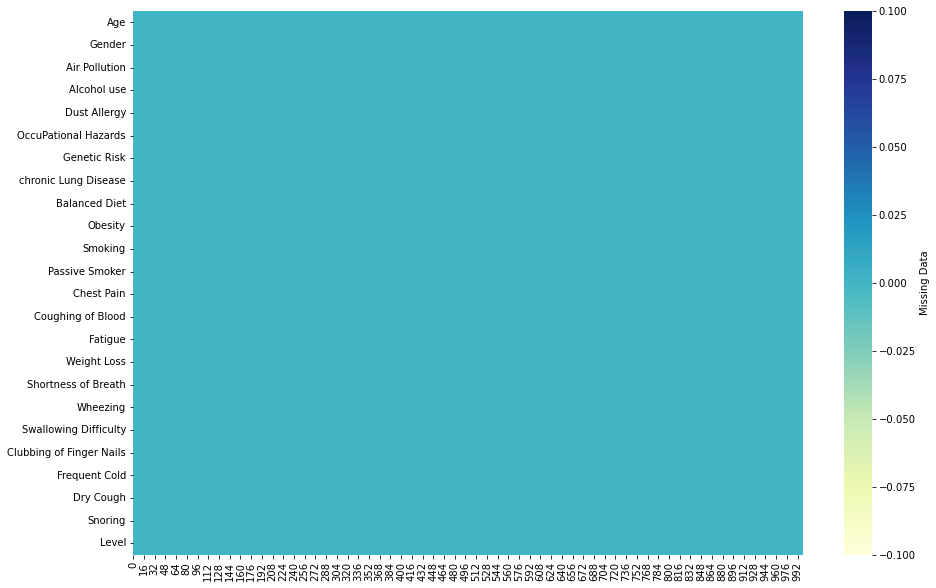

In [3]:
plt.figure(figsize = (15,10))
sns.heatmap(df.isna().transpose(), cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

plt.show()

### Feature Distribution

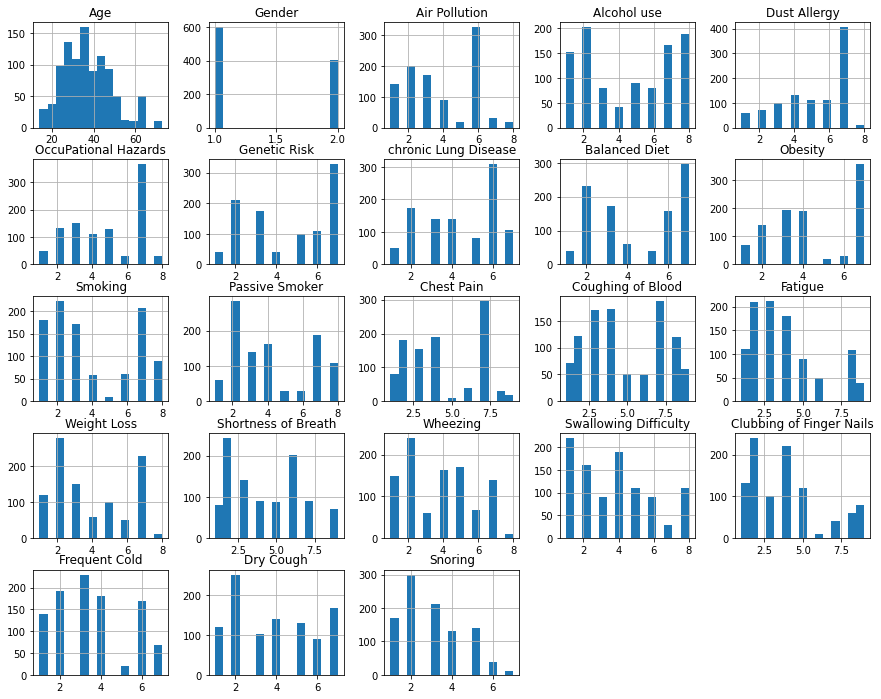

In [4]:
df.hist(figsize=(15, 12), bins = 15)
plt.title('Features Distribution')
#plt.savefig('./images/feature_distribution.png')
plt.show()

In [5]:
df.Level.unique()

array(['Low', 'Medium', 'High'], dtype=object)

### Correlation Plot

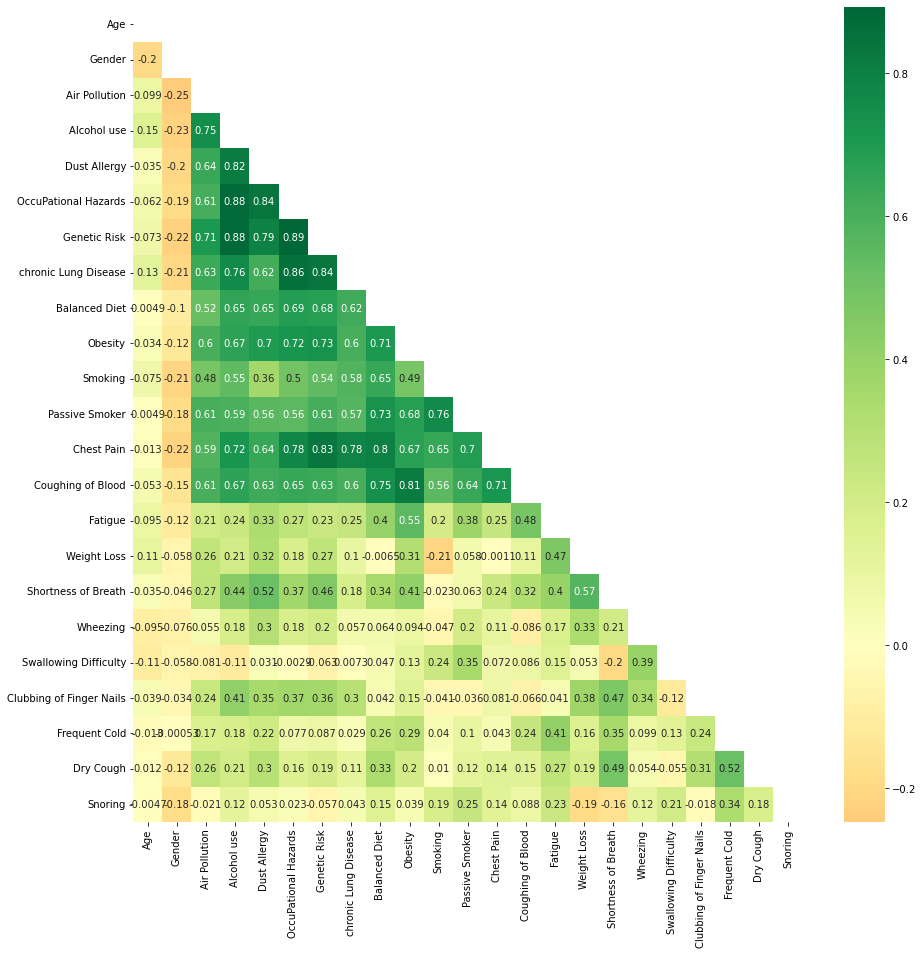

In [6]:
plt.figure(figsize=(15,15))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
p=sns.heatmap(df.corr(), annot=True,cmap='RdYlGn',center=0, mask = mask) #.get_figure().savefig('./images/correlation_plot.png')

### Boxplots

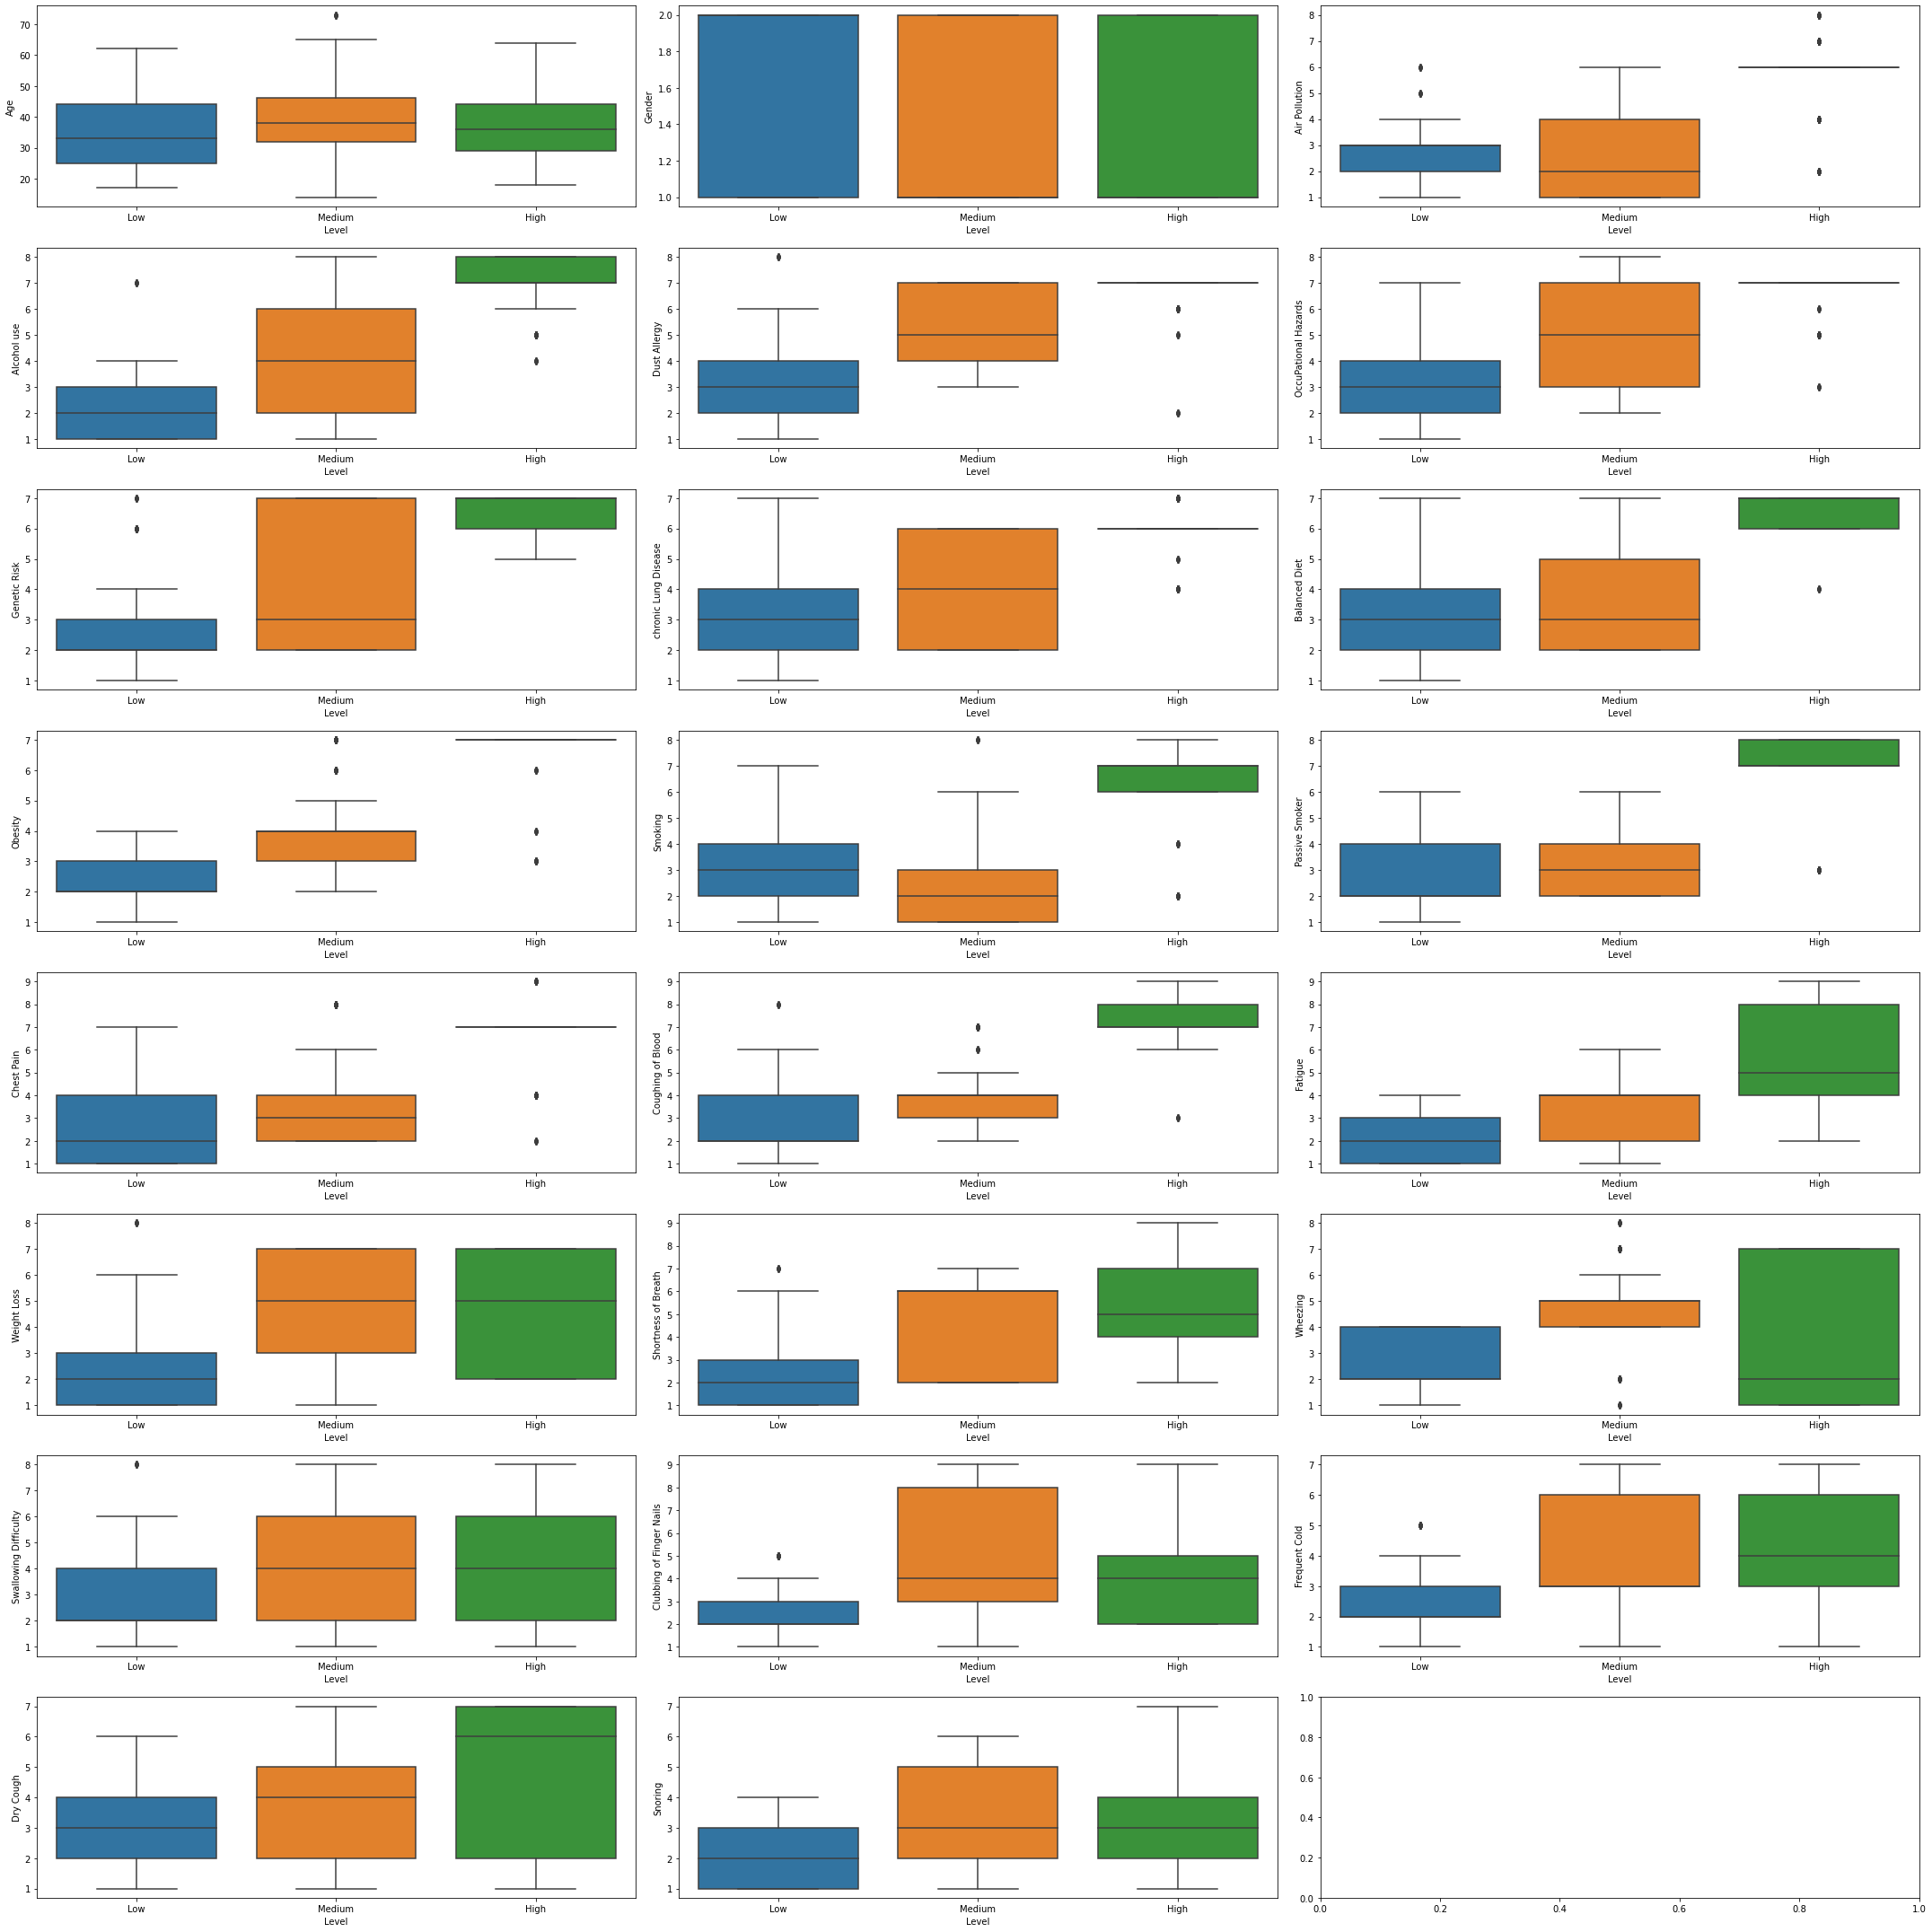

In [7]:
fig, ax = plt.subplots(nrows = 8, ncols=3, figsize=(30,30))
row = 0
col = 0
for i in range(len(df.columns)-1):
    if col > 2:
        row += 1
        col = 0
    axes = ax[row,col]
    sns.boxplot( x = df['Level'], y = df[df.columns[i]],ax=axes)
    col += 1
plt.tight_layout()
#plt.savefig('./images/boxplot.png')
plt.show()

In [8]:
# X & y declaration
# Convert y to dummy data
X = df.drop(['Level'], axis=1)
y = pd.get_dummies(df['Level'])

In [9]:
# Train test split . . .
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.33, random_state=0)

In [11]:
# Feature scaling so we don't bias the output
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
# sequential model to initialise our ann and dense module to build the layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from sklearn.metrics import classification_report

classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = X.shape[1]))

# Adding the second hidden layer
classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 8, activation = "relu"))

# Adding the output layer
classifier.add(Dense(units = 3, kernel_initializer = 'uniform', activation = 'softmax'))

# Compiling the ANN | means applying SGD on the whole ANN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', 
                   metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, epochs = 10)

score, acc = classifier.evaluate(X_train, y_train,batch_size=10)

print('Train score:', score)
print('Train accuracy:', acc)
# Part 3 - Making predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

print('____'*20)
score, acc = classifier.evaluate(X_test, y_test,batch_size=10)

print('Test score:', score)
print('Test accuracy:', acc)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test.values.argmax(axis=1), y_pred.argmax(axis=1))
print(cm)

Epoch 1/10
21/21 [==============================] - 1s 2ms/step - loss: 1.0973 - accuracy: 0.4552
Epoch 2/10
21/21 [==============================] - 0s 2ms/step - loss: 1.0877 - accuracy: 0.6493
Epoch 3/10
21/21 [==============================] - 0s 2ms/step - loss: 1.0483 - accuracy: 0.6493
Epoch 4/10
21/21 [==============================] - 0s 5ms/step - loss: 0.9425 - accuracy: 0.6493
Epoch 5/10
21/21 [==============================] - 0s 4ms/step - loss: 0.7575 - accuracy: 0.6493
Epoch 6/10
21/21 [==============================] - 0s 3ms/step - loss: 0.5820 - accuracy: 0.8925
Epoch 7/10
21/21 [==============================] - 0s 4ms/step - loss: 0.4742 - accuracy: 0.8552
Epoch 8/10
21/21 [==============================] - 0s 3ms/step - loss: 0.3897 - accuracy: 0.8851
Epoch 9/10
21/21 [==============================] - 0s 3ms/step - loss: 0.3092 - accuracy: 0.9597
Epoch 10/10
67/67 [==============================] - 0s 2ms/step - loss: 0.2049 - accuracy: 0.9731
Train score: 0.2049

### Confusion Matrix

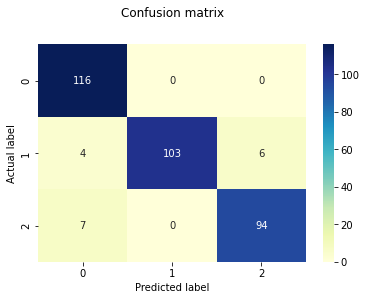

In [13]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap='YlGnBu', fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig('./images/confusion_matrix.png')

In [14]:
# import classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       116
           1       1.00      0.91      0.95       113
           2       0.94      0.93      0.94       101

   micro avg       0.97      0.95      0.96       330
   macro avg       0.97      0.95      0.96       330
weighted avg       0.97      0.95      0.96       330
 samples avg       0.95      0.95      0.95       330



### ROC-AUC Score

ROC AUC score: 0.9669963215224101


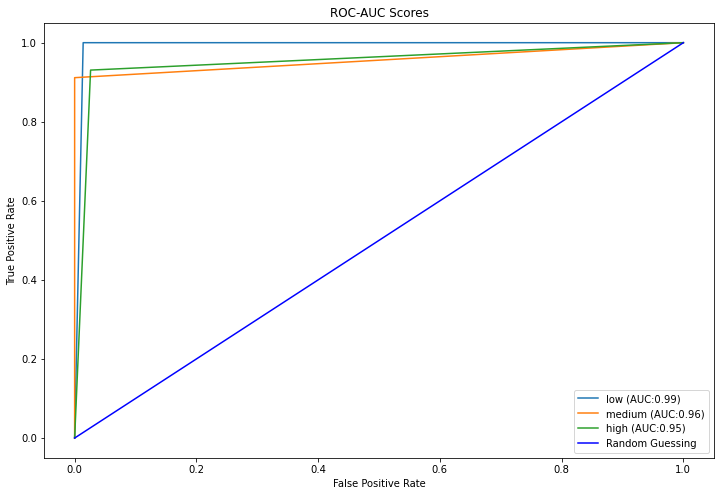

In [15]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score
target = ['low', 'medium', 'high']

fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# function for scoring roc auc for multi-class
def multiclass_roc_auc_score(y_test, y_pred, average='macro'):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label='Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)

print('ROC AUC score:', multiclass_roc_auc_score(y_test, y_pred))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.title('ROC-AUC Scores')
plt.savefig('./images/roc_auc.png')
plt.show()